# Redes Neurais Convolucionais (CNN)

## Teoria

### Etapa 1: Operador de convolução

* Kernels: Matrizes que, ao aplicadas na imagem, criam uma característica única sobre estas, podem intensificar:
    * Bordas
    * Borrões
    * et

* Utilizamos vários kernels para gerar vários mapas de características

### Etapa 2: Pooling

Redução do tamanho da imagem, afim de facilitar o processamento.
* Evita overfitting
* Evita ruídos desnecessários

### Etapa 3: Flattening

Transformar *MATRIZ* EM **VETOR**

Desta forma, podemos utilizar esta como uma rede neural densa (já visto em redes neurais artificiais densas).

### Etapa 4: Rede Neural Densa

* Retorna a probabilidade de cada uma das classes no fim
* Função de ativação é importante
* Além do ajuste dos pesos, também é feita a mudança do detector de características

## Aplicação 1: MNIST

### Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import StratifiedKFold

### Dividindo Base de dados

Text(0.5, 1.0, 'Classe5')

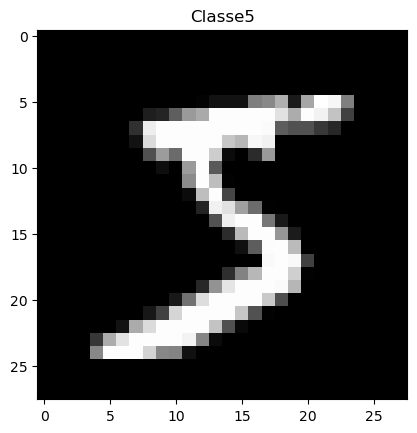

In [2]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treino[0], cmap= 'gray')
plt.title("Classe" + str(y_treino[0]))

In [3]:
previsores_treino = X_treino.reshape(X_treino.shape[0], 28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_treino = previsores_treino.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [4]:
previsores_treino /= 255
previsores_teste /= 255

In [5]:
classe_treino = to_categorical(y_treino, 10)
classe_teste = to_categorical(y_teste, 10)

### Criando o classificador

**ETAPA 1: OPERADOR DE CONVOLUÇÃO**

In [10]:
classificador = Sequential()    # Rede Convolucional em 2D
classificador.add(
    Conv2D(32, (3,3),               # 32 Kernels, matrizes de dimensão 3x3
        input_shape = (28,28,1),    # Dimensões da imagem entrada
        activation = 'relu'         # Função de ativação
    )         
)

**ETAPA 2: POOLING**

In [11]:
classificador.add(
    MaxPool2D( pool_size= (2,2) )
)

**ETAPA 3: FLATTERING**

In [12]:
classificador.add(
    Flatten()
)

**ETAPA 4: REDE NEURAL DENSA**

In [13]:
qtd_neuronios = (13 * 13 + (10)) / 2
qtd_neuronios

89.5

In [14]:
classificador.add(          # Camada Oculta
    Dense(
        units = 128,
        activation= 'relu'
    )
)
classificador.add(          # Camada saida
    Dense(
        units = 10,
        activation= 'softmax'
    )
)
classificador.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [15]:
classificador.fit(
    previsores_treino,
    classe_treino,
    batch_size= 128, 
    epochs = 5,
    validation_data= (previsores_teste, classe_teste)
)

Epoch 1/5
469/469 [==============================] - 9s 7ms/step - loss: 0.2196 - accuracy: 0.9371 - val_loss: 0.0788 - val_accuracy: 0.9767
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.0579 - val_accuracy: 0.9814
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0461 - accuracy: 0.9866 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0437 - val_accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.0416 - val_accuracy: 0.9860


In [16]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

313/313 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.9860


[0.04161224886775017, 0.9860000014305115]

### Melhorias na RN

* Podemos aplicar a normalização (valores entre 0 e 1) na camada de convolução, desta forma, estaremos otimizando o processamento da rede.
* Também iremos aplicar uma outra camada de convolução 2D, filtrando mais ainda a imagem.
* Adicionar DropOut para evitar overfitting.

In [19]:
classificador = Sequential()        # Rede Convolucional em 2D

classificador.add(
    Conv2D(32, (3,3),               # 32 Kernels, matrizes de dimensão 3x3
        input_shape = (28,28,1),    # Dimensões da imagem entrada
        activation = 'relu'         # Função de ativação
    )         
)
classificador.add(                  # Normalização da convolução
    BatchNormalization()
)
classificador.add(                  # Etapa 2: Pooling
    MaxPool2D( pool_size= (2,2) )
)
classificador.add(                  # Etapa 1: Convolução (novamente)
    Conv2D(32, (3,3),               
        activation = 'relu'         
    ) 
)
classificador.add(                  # Normalização da convolução
    BatchNormalization()
)
classificador.add(                  # Etapa 2: Pooling
    MaxPool2D( pool_size= (2,2) )
)
classificador.add(                  # Etapa 3: Flattering
    Flatten()
)
classificador.add(                  # Camada Oculta
    Dense(
        units = 128,
        activation= 'relu'
    )
)
classificador.add(                  # Dropout
    Dropout(0.2)
)
classificador.add(                  # Camada Oculta
    Dense(
        units = 128,
        activation= 'relu'
    )
)
classificador.add(                  # Dropout
    Dropout(0.2)
)
classificador.add(                  # Camada saida
    Dense(
        units = 10,
        activation= 'softmax'
    )
)
classificador.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [20]:
classificador.fit(
    previsores_treino,
    classe_treino,
    batch_size= 128, 
    epochs = 5,
    validation_data= (previsores_teste, classe_teste)
)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2019 - accuracy: 0.9370 - val_loss: 0.1251 - val_accuracy: 0.9665
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0638 - accuracy: 0.9809 - val_loss: 0.0366 - val_accuracy: 0.9875
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0428 - val_accuracy: 0.9866
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0395 - val_accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0357 - val_accuracy: 0.9883


In [21]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

313/313 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9883


[0.03571399301290512, 0.9883000254631042]

### Validação Cruzada

In [6]:
seed = 5
np.random.seed(seed)        # Mudando os números aleatórios

In [7]:
(X, y), (X_teste, y_teste) = mnist.load_data()

In [8]:
previsores = X.reshape( X.shape[0], 28, 28, 1)
previsores= previsores.astype('float32')
previsores /= 255

In [9]:
classe = to_categorical(y, 10)

In [25]:
kfold = StratifiedKFold(
    n_splits = 5,
    shuffle= True,
    random_state= seed
)
resultados = []

In [26]:
a = np.zeros(5)
b = np.zeros(
    shape = (classe.shape[0], 1)
)

In [27]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

AttributeError: module 'tensorflow' has no attribute 'GPUOptions'

In [28]:
with session:
    for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape = (classe.shape[0], 1))):
        # print('Indices Treinamento', indice_treinamento, 'Indices Teste', indice_teste)
        classificador = Sequential()        # Rede Convolucional em 2D

        classificador.add(                  # Etapa 1: Convolução
            Conv2D(32, (3,3),               # 32 Kernels, matrizes de dimensão 3x3
                input_shape = (28,28,1),    # Dimensões da imagem entrada
                activation = 'relu'         # Função de ativação
            )         
        )
        classificador.add(                  # Etapa 2: Pooling
            MaxPool2D( pool_size= (2,2) )
        )
        classificador.add(                  # Etapa 3: Flattering
            Flatten()
        )
        classificador.add(                  # Camada Oculta
            Dense(
                units = 128,
                activation= 'relu'
            )
        )
        classificador.add(                  # Camada saida
            Dense(
                units = 10,
                activation= 'softmax'
            )
        )
        classificador.compile(
            loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy']
        )
        classificador.fit(
            previsores[indice_treinamento],
            classe[indice_treinamento],
            batch_size= 128, 
            epochs = 5,
            validation_data= (previsores_teste, classe_teste)
        )
        precisao = classificador.evaluate(previsores[indice_teste], classe[indice_teste])
        resultados.append(precisao[1])

Train on 48000 samples, validate on 10000 samples
Epoch 1/5
47872/48000 [============================>.] - ETA: 0s - loss: 0.2432 - accuracy: 0.9324

c:\Users\Pepe\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


48000/48000 [==============================] - 3s 65us/sample - loss: 0.2428 - accuracy: 0.9326 - val_loss: 0.0910 - val_accuracy: 0.9721
Epoch 2/5
48000/48000 [==============================] - 3s 59us/sample - loss: 0.0752 - accuracy: 0.9781 - val_loss: 0.0594 - val_accuracy: 0.9810
Epoch 3/5
48000/48000 [==============================] - 3s 59us/sample - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 4/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.0373 - accuracy: 0.9889 - val_loss: 0.0484 - val_accuracy: 0.9841
Epoch 5/5
48000/48000 [==============================] - 3s 60us/sample - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0491 - val_accuracy: 0.9852
Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 76us/sample - loss: 0.2451 - accuracy: 0.9296 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 2/5
 9344/48000 [====>.........................] - ETA: 2s - loss:

In [22]:
print(resultados)
print(np.array(resultados).mean())

[0.981166660785675, 0.984000027179718, 0.9849166870117188, 0.98458331823349, 0.9788333177566528, 0.9828333258628845, 0.9828333258628845, 0.984250009059906, 0.984499990940094, 0.9826666712760925, 0.9838333129882812, 0.9837499856948853, 0.9817500114440918, 0.9823333621025085, 0.984416663646698, 0.9829166531562805, 0.9817500114440918]
0.9830196079085854


### Aumento da quantidade de imagens ( Augumentation )

Gera novas imagens em mais condições, girando elas, dando zoom nestas, etc

In [39]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

previsores_treino = X_treino.reshape(X_treino.shape[0], 28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

previsores_treino = previsores_treino.astype('float32')
previsores_teste = previsores_teste.astype('float32')
previsores_treino /= 255
previsores_teste /= 255

classe_treino = to_categorical(y_treino, 10)
classe_teste = to_categorical(y_teste, 10)

In [40]:
classificador = Sequential()        # Rede Convolucional em 2D

classificador.add(
    Conv2D(32, (3,3),               # 32 Kernels, matrizes de dimensão 3x3
        input_shape = (28,28,1),    # Dimensões da imagem entrada
        activation = 'relu'         # Função de ativação
    )         
)
classificador.add(                  # Etapa 2: Pooling
    MaxPool2D( pool_size= (2,2) )
)
classificador.add(                  # Etapa 3: Flattering
    Flatten()
)
classificador.add(                  # Camada Oculta
    Dense(
        units = 128,
        activation= 'relu'
    )
)
classificador.add(                  # Camada saida
    Dense(
        units = 10,
        activation= 'softmax'
    )
)
classificador.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [42]:
gerador_treinamento = ImageDataGenerator(
    rotation_range = 7,          # Grau de rotação da imagem
    horizontal_flip = True,      # Podemos fazer giros horizontais
    shear_range = 0.2,           # Fará alteração nos pixeis
    height_shift_range = 0.07,   # Faz modificação na faixa de altura da imagem   
    zoom_range= 0.2              # Aplica zoom na imagem   
)
gerador_teste = ImageDataGenerator()        # Não passamos parâmetros, pois não queremos aumentar o teste

In [43]:
base_treino = gerador_treinamento.flow(
    previsores_treino, 
    classe_treino,
    batch_size = 128
)
base_teste = gerador_teste.flow(
    previsores_teste, 
    classe_teste,
    batch_size = 128
)

In [44]:
classificador.fit_generator(
    base_treino, 
    steps_per_epoch = 60000/128,        # Qtd. de imagens / Batch_Size (executar mais rápido, pula imagens)
    epochs = 5,
    validation_data= base_teste,
    validation_steps= 10000 / 128
)

c:\Users\Pepe\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
468/468 [==============================] - 14s 29ms/step - loss: 0.5529 - accuracy: 0.8236 - val_loss: 0.1843 - val_accuracy: 0.9397
Epoch 2/5
468/468 [==============================] - 14s 29ms/step - loss: 0.2399 - accuracy: 0.9256 - val_loss: 0.1174 - val_accuracy: 0.9627
Epoch 3/5
468/468 [==============================] - 15s 33ms/step - loss: 0.1724 - accuracy: 0.9465 - val_loss: 0.0851 - val_accuracy: 0.9740
Epoch 4/5
468/468 [==============================] - 14s 30ms/step - loss: 0.1429 - accuracy: 0.9562 - val_loss: 0.1095 - val_accuracy: 0.9627
Epoch 5/5
468/468 [==============================] - 13s 28ms/step - loss: 0.1229 - accuracy: 0.9622 - val_loss: 0.0715 - val_accuracy: 0.9772


## Aplicação 2: Identificação de gatos e cachorros

### Importando bibliotecas

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

from sklearn.model_selection import StratifiedKFold

### Criando o modelo

In [48]:
classificador = Sequential()

# Etapa 1 e 2
classificador.add( Conv2D(
    32, (3,3),
    input_shape = (64, 64, 3),
    activation= 'relu'
))
classificador.add( BatchNormalization() )
classificador.add( MaxPool2D(pool_size = (2,2) ) )
classificador.add( Conv2D(
    32, (3,3),
    input_shape = (64, 64, 3),
    activation= 'relu'
))
classificador.add( BatchNormalization() )
classificador.add( MaxPool2D(pool_size = (2,2) ) )

# Etapa 3
classificador.add( Flatten())

# Etapa 4
classificador.add( Dense(
    units = 128, activation = 'relu'
))
classificador.add( Dropout(0.2) )
classificador.add( Dense(
    units = 128, 
    activation = 'relu'
))
classificador.add( Dropout(0.2) )
classificador.add( Dense(
    units = 1, 
    activation = 'sigmoid'
))

# Compilando o classificador
classificador.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

### Augumentation

In [49]:
gerador_treinamento = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 7,
    horizontal_flip = True,
    shear_range= 0.2,
    height_shift_range = 0.07,
    zoom_range= 0.2 
)

gerador_teste = ImageDataGenerator(
    rescale = 1./255
)

In [60]:
base_treinamento = gerador_treinamento.flow_from_directory(
    'dados/dataset_gatos-cachorros/training_set',
    target_size= (64, 64),
    batch_size= 16,
    class_mode= 'binary'
)

base_teste = gerador_treinamento.flow_from_directory(
    'dados/dataset_gatos-cachorros/test_set',
    target_size= (64, 64),
    batch_size= 16,
    class_mode= 'binary'
)


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [61]:
classificador.fit_generator(
    base_treinamento,
    steps_per_epoch= 4000 / 16,
    epochs = 10,
    validation_data = base_teste,
    validation_steps= 1000 / 32
)

Epoch 1/10
250/250 [==============================] - 13s 52ms/step - loss: 0.5948 - accuracy: 0.6900 - val_loss: 0.5982 - val_accuracy: 0.6660
Epoch 2/10
250/250 [==============================] - 13s 53ms/step - loss: 0.5600 - accuracy: 0.7078 - val_loss: 0.7771 - val_accuracy: 0.6035
Epoch 3/10
250/250 [==============================] - 13s 52ms/step - loss: 0.5390 - accuracy: 0.7275 - val_loss: 0.6695 - val_accuracy: 0.6465
Epoch 4/10
250/250 [==============================] - 13s 52ms/step - loss: 0.5254 - accuracy: 0.7400 - val_loss: 0.7844 - val_accuracy: 0.5527
Epoch 5/10
250/250 [==============================] - 13s 52ms/step - loss: 0.5021 - accuracy: 0.7510 - val_loss: 0.5837 - val_accuracy: 0.6855
Epoch 6/10
250/250 [==============================] - 13s 53ms/step - loss: 0.4754 - accuracy: 0.7707 - val_loss: 0.5684 - val_accuracy: 0.7324
Epoch 7/10
250/250 [==============================] - 14s 55ms/step - loss: 0.4770 - accuracy: 0.7713 - val_loss: 0.5435 - val_accuracy:

### Testando com uma imagem

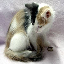

In [64]:
imagem_teste = image.load_img('dados/dataset_gatos-cachorros/test_set/gato/cat.3500.jpg', target_size= (64,64))
imagem_teste

In [69]:
imagem_teste =  img_to_array(imagem_teste)
imagem_teste

array([[[196., 195., 201.],
        [195., 194., 200.],
        [209., 208., 214.],
        ...,
        [191., 188., 195.],
        [193., 190., 197.],
        [189., 186., 193.]],

       [[204., 203., 209.],
        [206., 205., 211.],
        [194., 193., 199.],
        ...,
        [192., 189., 196.],
        [197., 194., 201.],
        [187., 184., 191.]],

       [[196., 195., 201.],
        [196., 195., 201.],
        [193., 192., 198.],
        ...,
        [191., 188., 195.],
        [189., 186., 193.],
        [178., 175., 182.]],

       ...,

       [[250., 250., 250.],
        [249., 249., 249.],
        [252., 252., 252.],
        ...,
        [230., 228., 229.],
        [234., 232., 233.],
        [249., 247., 248.]],

       [[248., 248., 248.],
        [251., 251., 251.],
        [249., 249., 249.],
        ...,
        [226., 224., 225.],
        [231., 229., 230.],
        [248., 246., 247.]],

       [[249., 249., 249.],
        [247., 247., 247.],
        [245., 2

In [70]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [71]:
previsao = classificador.predict(imagem_teste)
previsao

array([[1.]], dtype=float32)

In [72]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

Como 1 significa "gato", temos 100% de chance de ser um gato

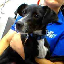

In [80]:
imagem_teste = image.load_img('dados/dataset_gatos-cachorros/test_set/cachorro/dog.3670.jpg', target_size= (64,64))
imagem_teste

In [81]:
imagem_teste =  img_to_array(imagem_teste)
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [82]:
previsao = classificador.predict(imagem_teste)
previsao

array([[0.]], dtype=float32)